In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv("DiwaliSalesData.csv",encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'],axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df['Amount'] = df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int32')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
df.rename(columns = {'Marital_Status':'Shaadi'})
#it will not be saved as we have not used (inplace = True)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [14]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EXPLORATRY DATA ANALYSIS (EDA)

GENDER

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

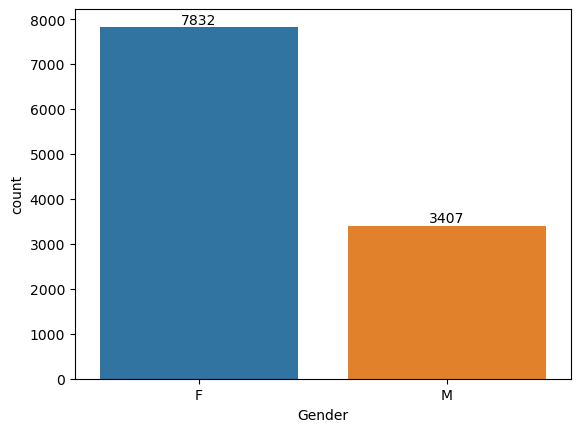

In [17]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

#this shows maximum no. of customers are female

In [18]:
sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False )

<Axes: xlabel='Gender', ylabel='Amount'>

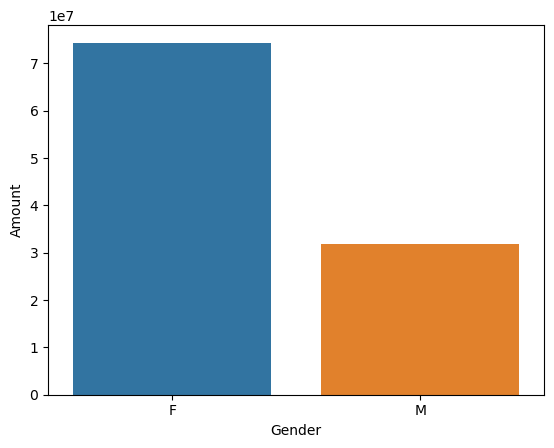

In [19]:
sns.barplot(x = 'Gender',y='Amount',data =sales_gen)
# this shows that purchasing power of female is more than male

From the above graph we get to know that most of byers are female and even the purchasing power of female is more than man  

AGE

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

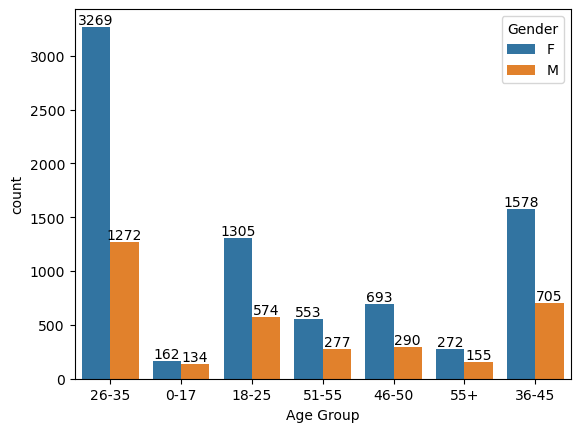

In [21]:
ax = sns.countplot(x = 'Age Group',data = df,hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

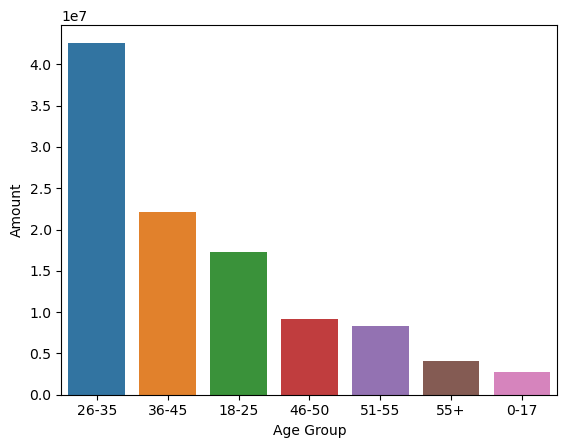

In [22]:
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False )

sns.barplot(x = 'Age Group',y='Amount',data =sales_age)

# From above graph we can see that most buyers are of age group between 26-35 years female

States

In [23]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

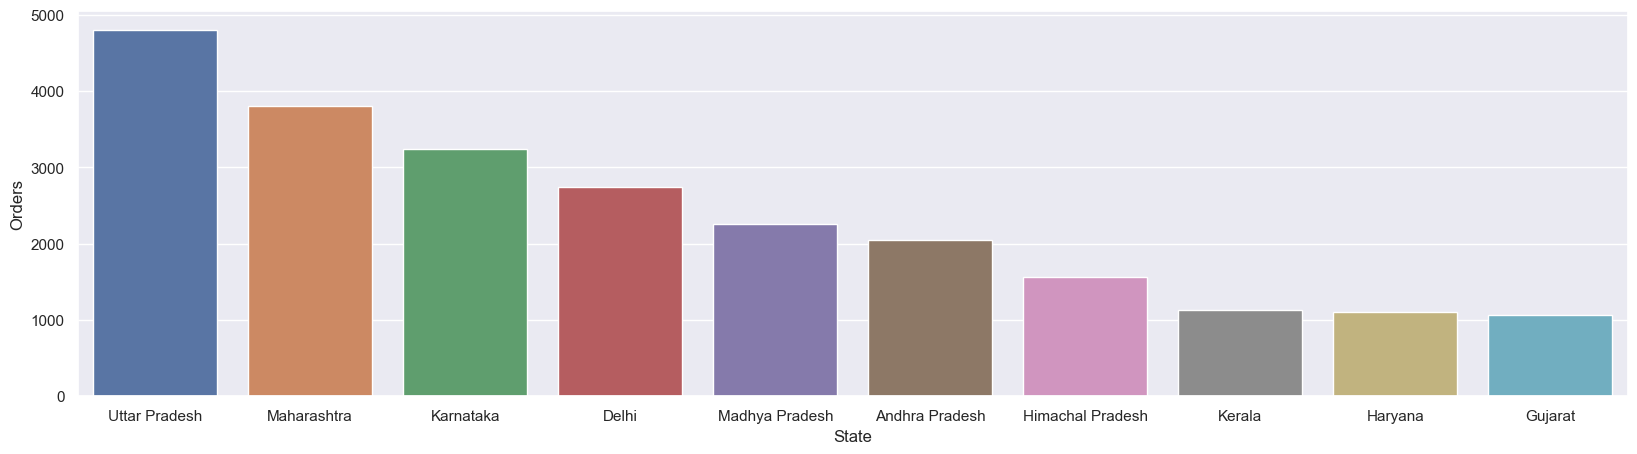

In [24]:
sales_states = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'State', y = 'Orders',data =sales_states)

<Axes: xlabel='State', ylabel='Amount'>

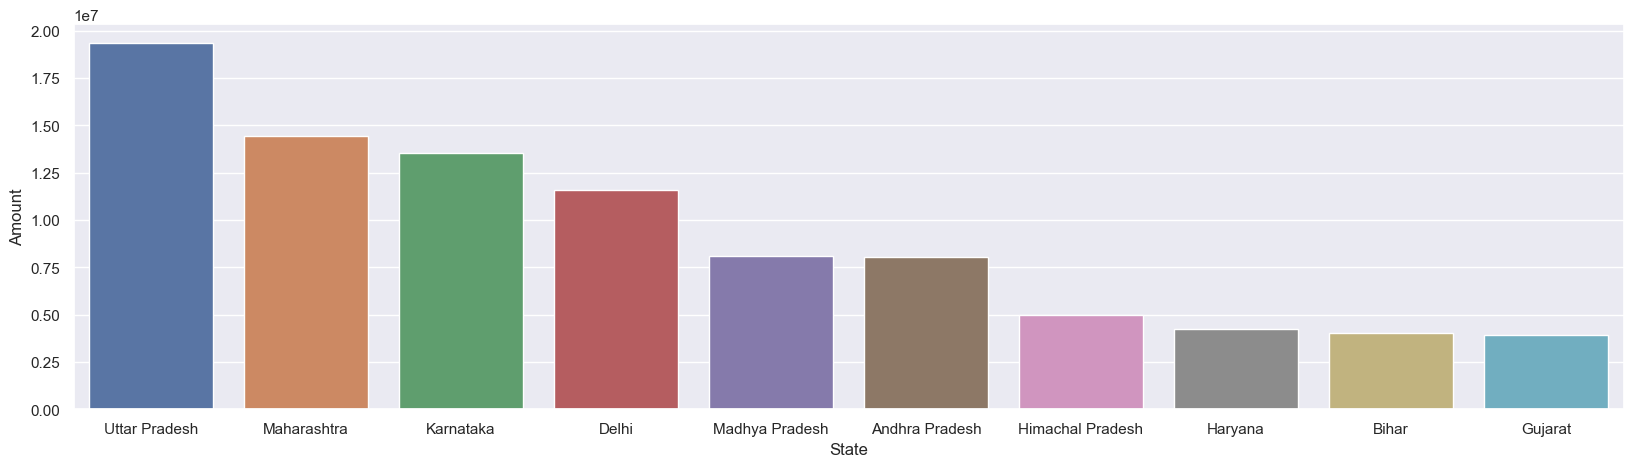

In [25]:
sales_state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
sns.barplot(x = 'State',y ='Amount',data = sales_state)

# From aboves graph we get that our maximum order and their amounts are from UP , Maharashtra,Karnataka

Marital Status

In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

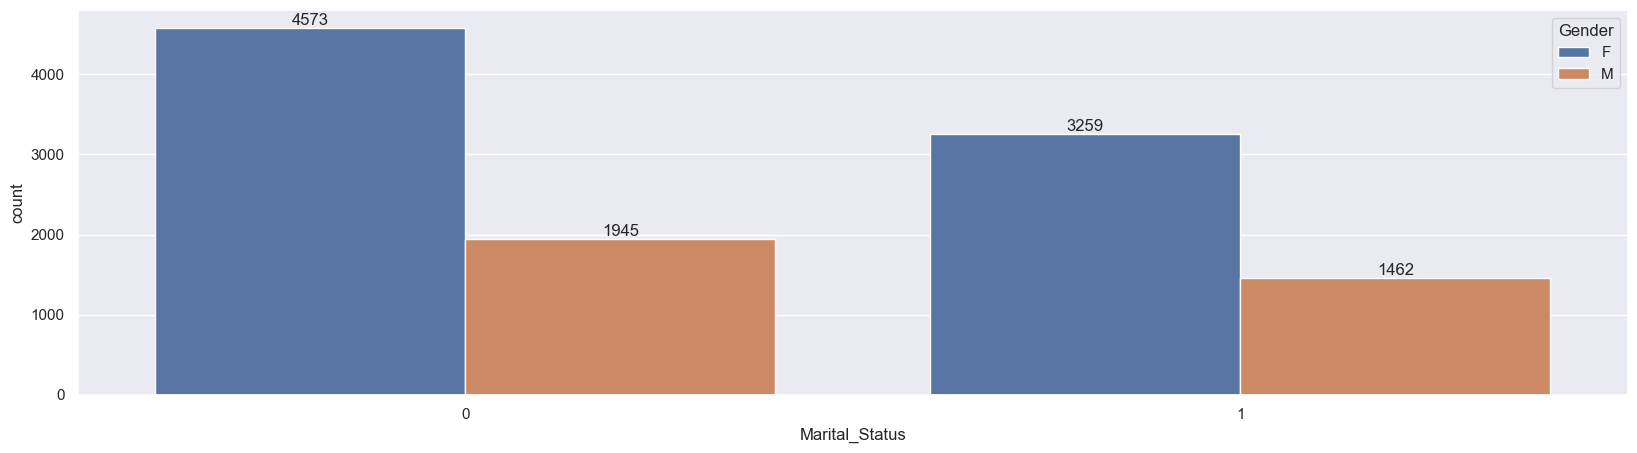

In [27]:
ax = sns.countplot(x = 'Marital_Status',data = df,hue = 'Gender')

sns.set(rc={'figure.figsize':(6,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

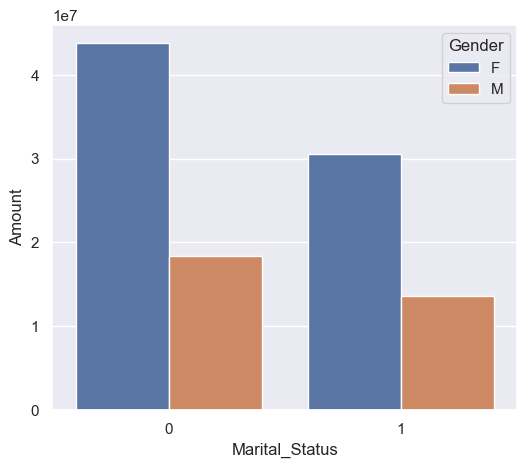

In [28]:
sales_marital = df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False )

sns.barplot(x = 'Marital_Status',y='Amount',data =sales_marital,hue = 'Gender')

# From above we can conclude that most buyers are married Females and they have the highest purchasing power  

Occupation

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

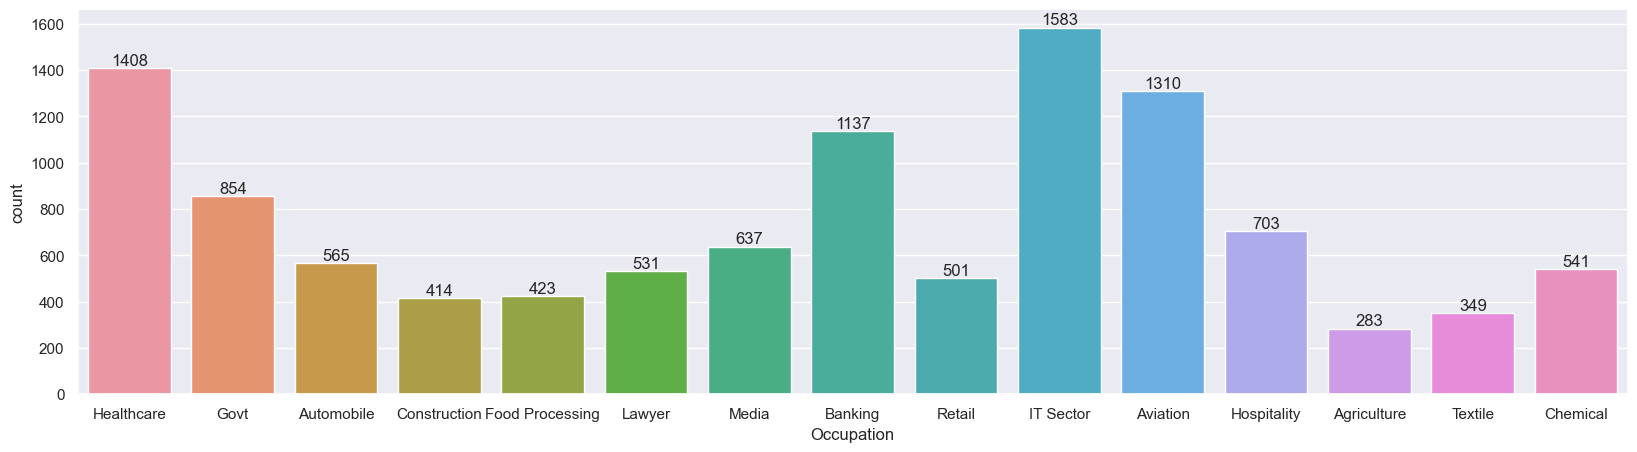

In [30]:
sns.set(rc={'figure.figsize':(20,5)})

ax = sns.countplot(x='Occupation',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

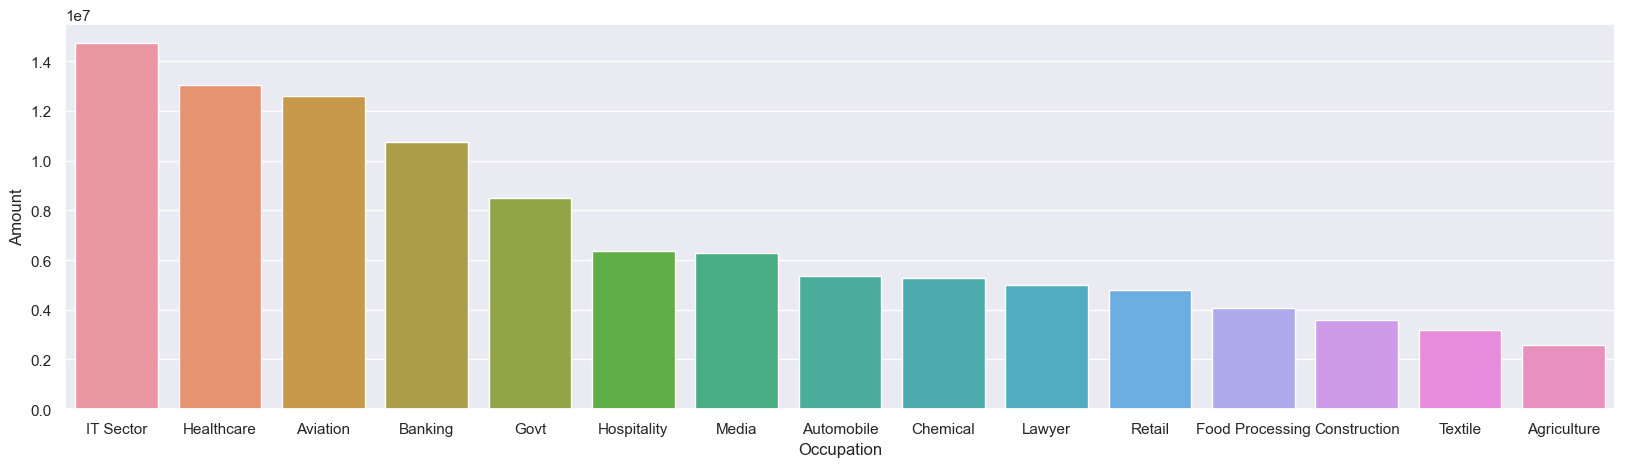

In [31]:
sales_occupation = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False )

sns.barplot(x = 'Occupation',y = 'Amount',data =sales_occupation)

# From above data we can see that maximum buyers are working in IT sector, Healthcare and Aviation sector

Product Category

In [32]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

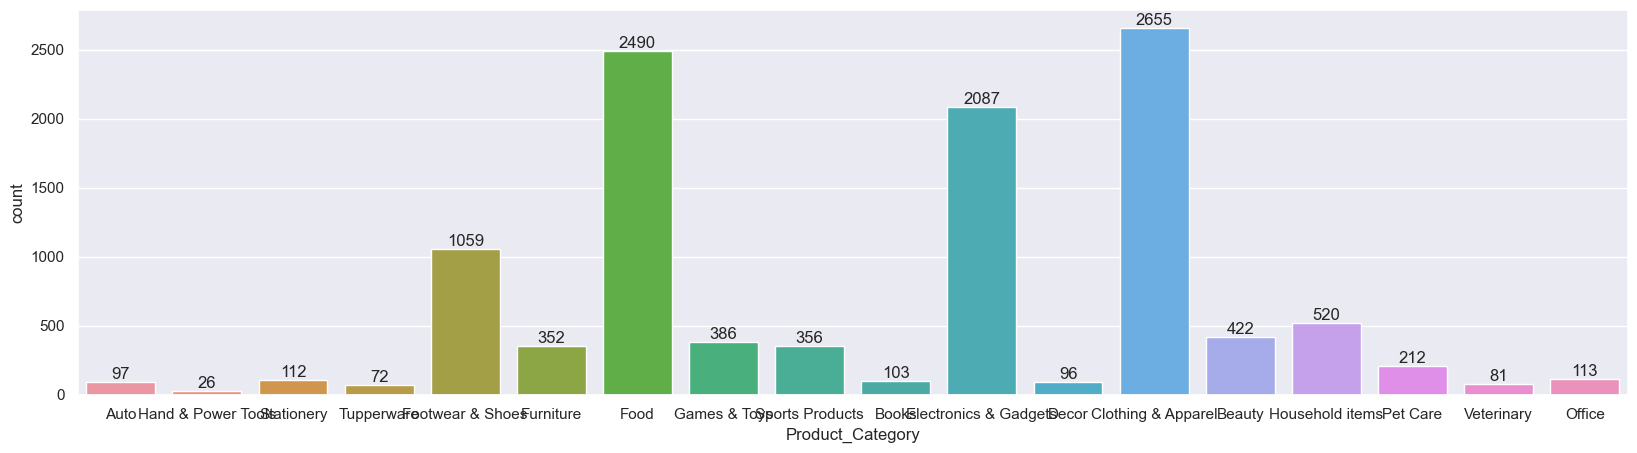

In [33]:
ax = sns.countplot(x='Product_Category',data = df)
sns.set(rc={'figure.figsize':(35,15)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

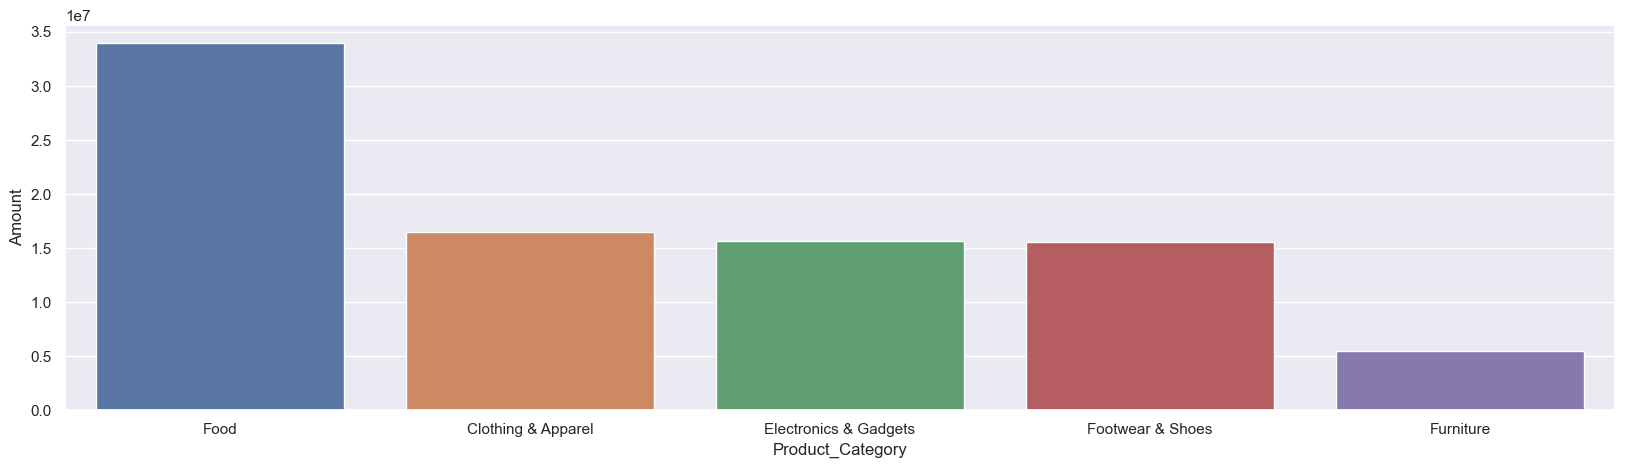

In [34]:
sales_marital = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False ).head()
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x = 'Product_Category',y = 'Amount',data =sales_marital)

From above data we got to know that maximum product sold are from clothing then food
but when we see the amount spend, food comes to be first then clothing

<Axes: xlabel='Product_ID', ylabel='Amount'>

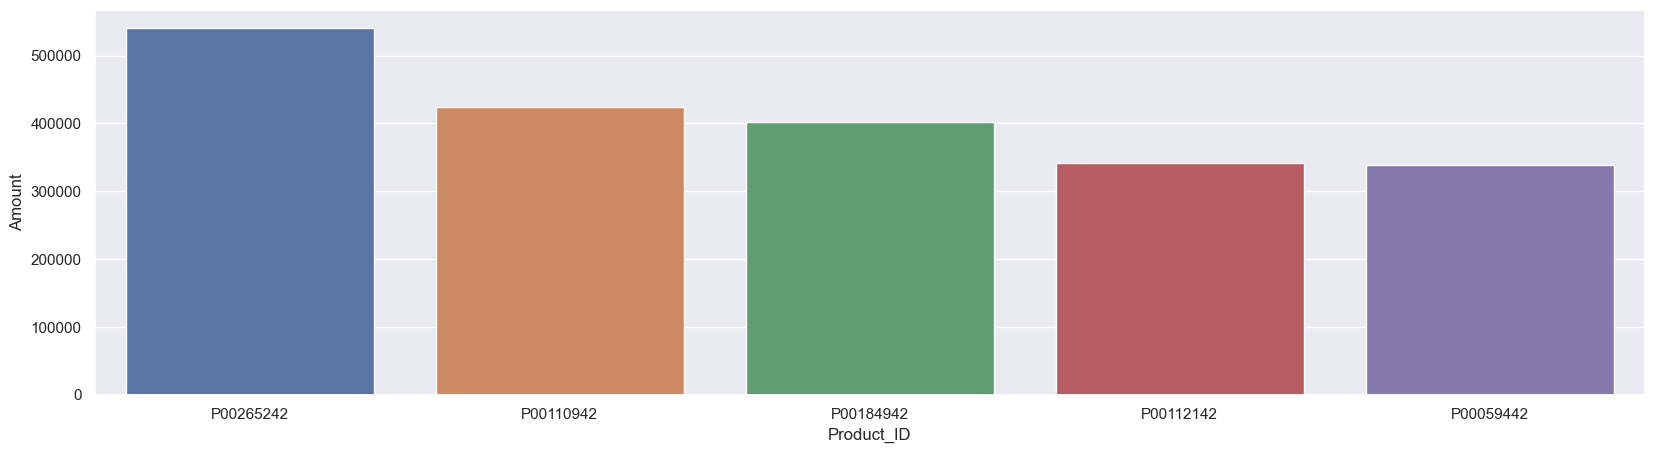

In [35]:
sales_marital = df.groupby(['Product_ID'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False ).head()
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x = 'Product_ID',y = 'Amount',data =sales_marital)

<Axes: xlabel='Product_ID', ylabel='Orders'>

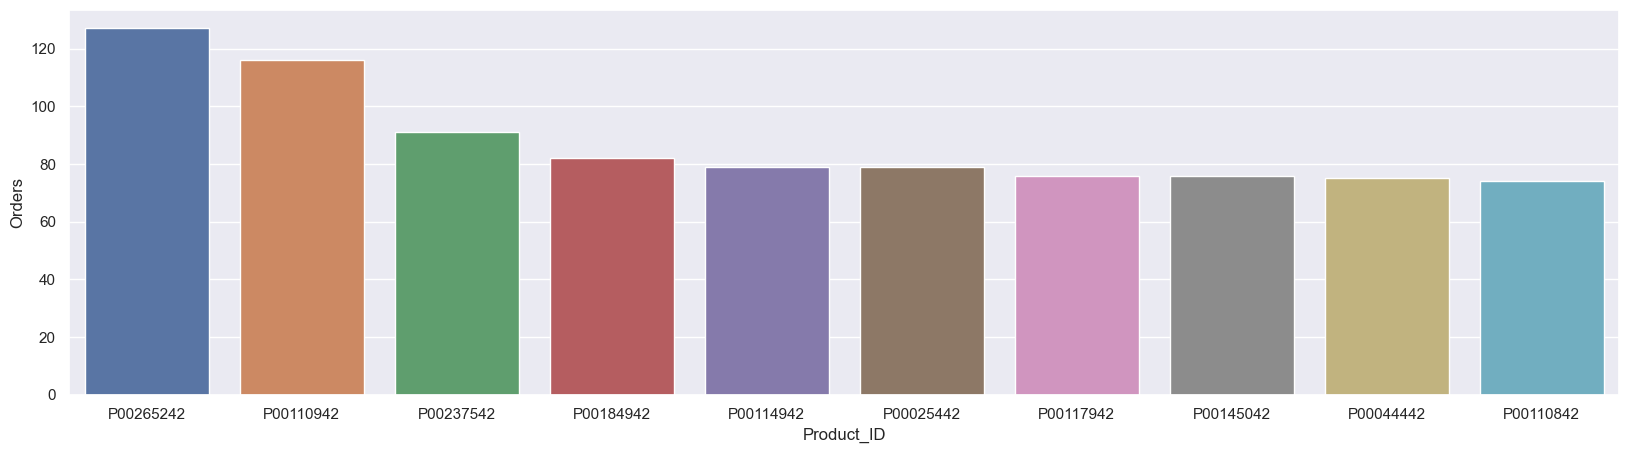

In [36]:
sales_marital = df.groupby(['Product_ID'],as_index = False)['Orders'].sum().sort_values(by='Orders',ascending = False ).head(10)
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x = 'Product_ID',y = 'Orders',data =sales_marital)

<Axes: xlabel='Product_ID'>

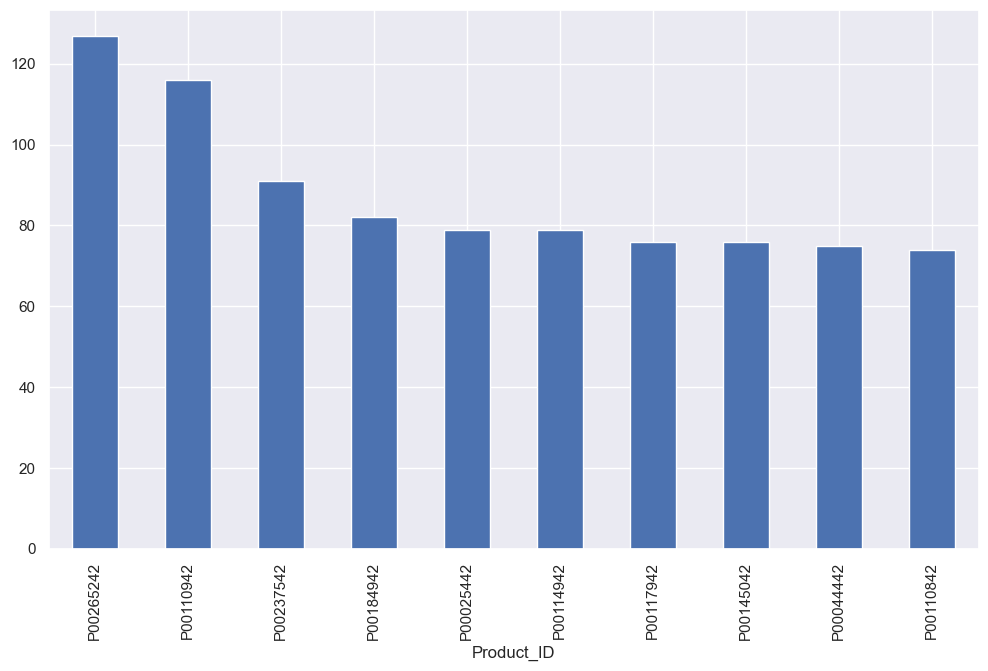

In [38]:
# top 10 most sold product(same as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')

From above graph we got to know the products with maximum sales with their Product ID

# Conclusion:

Married women age 26-35 yrs from UP,Maharastra and karnataka working in IT, Healthcare and Aviation are most likely to buy products from Food,clothing and Electronics category.